Cyclistic Bike Share Data Analysis

Cyclistic is a bike share company in chicago which has asked me to perform data analysis to advise their marketing efforts.  The director of marketing believes they must maximize annual memberships in order to generate greater profits from the bike-share system.  My audience is the internal stakeholders, including the marketing director, other marketing employees, as well as other analysts in my department.  My analysis will help our marketing team identify who to advertise to for the maximization of annual memberships. 

The data provided by Cyclistic is organized byn month in indivivual .csv files. These files were likely pulled from a table in the cyclistic database.  It is organized by ride, with each ride having a unique ride ID.  I believe this data is reliable considering it came directly from the stakeholder's database.  This information would have been collected automatically by the bike stations so it is unlikely there are errors in the data.

In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt
import math
import seaborn as sns
import matplotlib.pyplot as plt


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cyclistic-trips-202108-to-202207/202110-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202109-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202111-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202202-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202203-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202205-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202206-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202108-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202201-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202204-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202112-divvy-tripdata.csv
/kaggle/input/cyclistic-trips-202108-to-202207/202207-divvy-tripdata.csv


I want to set my default path to the location of my dataset so that I can acces their names.  From here I will make a list of the .csv file names:

In [2]:
os.chdir('/kaggle/input/cyclistic-trips-202108-to-202207')
filelist = os.listdir()

By creating a dataframe and appending all 12 months of data to the same frame, I can run operations on the whole dataset rather than just one month at a time.  A preview of this new dataframe is shown below:

In [3]:
tempFrame = pd.DataFrame()
frame = pd.DataFrame()
for file in filelist: 
    tempFrame = pd.read_csv(file)
    frame = frame.append(tempFrame)

frame.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member


To start that data cleaning process, I will need some more information about the dataset. Let's begin by finding out how many rows and collumns there are:

In [4]:
frame.shape

(5901463, 13)

There are 12 collumns and 5,901,463 rows.  That's a lot of trips, each one with their own unique ride_id. This data was found already in .csv format and I did no have to pull it from a database. I would assume that ride_id is the primary key and all this information is stored in a table of ride data.

We must ensure our data is in the correct operable data type.

Here we will be able to see the datatypes of attributes:

In [5]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901463 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 630.3+ MB


The attributes 'started_at' and 'ended_at' use the data type object, but should be cast to a date format:

In [6]:
frame['started_at'] = pd.to_datetime(frame['started_at'])
frame['ended_at'] = pd.to_datetime(frame['ended_at'])
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901463 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 630.3+ MB


Now that our ride start and end data is formatted we can create new collumns of information from these attributes.

I will the weekday of a ride can be found by matching the dayofweek index to the associated list of weekdays:

In [7]:
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
frame['weekday'] = [day[i] for i in frame['started_at'].dt.dayofweek]

And I will find the difference between the start and end times to calculate a ride duration.  The resulting timedelta64 value is converted into hours and cast to float:

In [8]:
td = frame ['ended_at'] - frame['started_at']
frame['duration_minutes'] = td / np.timedelta64(1, 'm')

The ride distance can be found using the distance formula and lattutude & longitude location data:
d=√((x_2-x_1)²+(y_2-y_1)²)
This distance is only an approximation due to the nature of lattitude and longitude conversions

In [9]:
latdif = frame['start_lat']*69-frame['end_lat']*69
lngdif = frame['start_lng']*54.6-frame['end_lng']*54.6 
distbase = latdif**2 + lngdif**2
frame['distance'] = distbase**.5

Now that both time in hours and approximate distance in hours are both recorded as float, we can calculate the average speed of the ride:

In [10]:
frame['avg_speed_mph'] = 60*frame['distance']/frame['duration_minutes']

Finally we will add a month collumn:

In [11]:
frame['month'] = pd.DatetimeIndex(frame['started_at']).month

Now that all the necessary collumns have been added, it is time to clean the data.

Here we can see all the entries with a null value:

In [12]:
frame.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    860786
start_station_id      860784
end_station_name      919896
end_station_id        919896
start_lat                  0
start_lng                  0
end_lat                 5590
end_lng                 5590
member_casual              0
weekday                    0
duration_minutes           0
distance                5590
avg_speed_mph           5693
month                      0
dtype: int64

After taking a closer look, there are many rides with either a start location and no end location, and end location and no start location, or no start or end location.  This probalby happens when: a bike is taken out for maintainence, a bike is put back in after maintainance, a bike is lost or damaged, a bike is not returned properly, or there is an error in recording the ride information.

In any of these cases where location data is missing, we want to exclude the ride from our analysis:

In [13]:
cleanframe = frame.dropna()
cleanframe.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
weekday               0
duration_minutes      0
distance              0
avg_speed_mph         0
month                 0
dtype: int64

Before our data cleaning is finished we shoud see if there are any outliers that need to be left out:

In [14]:
cleanframe.describe()

,start_lat,start_lng,end_lat,end_lng,duration_minutes,distance,avg_speed_mph,month
count,4.629131e+06,4.629131e+06,4.629131e+06,4.629131e+06,4.629131e+06,4.629131e+06,4.629131e+06,4.629131e+06
mean,4.190258e+01,-8.764433e+01,4.190286e+01,-8.764457e+01,1.850486e+01,1.338694e+00,inf,7.220868e+00
std,4.150111e-02,2.499404e-02,4.163522e-02,2.437710e-02,8.200850e+01,1.233693e+00,NaN,2.519776e+00
min,4.164850e+01,-8.783325e+01,4.164850e+01,-8.783000e+01,-1.290833e+02,0.000000e+00,-3.478962e+02,1.000000e+00
25%,4.188189e+01,-8.765703e+01,4.188209e+01,-8.765804e+01,6.400000e+00,5.720731e-01,4.413772e+00,5.000000e+00
50%,4.189766e+01,-8.764122e+01,4.189776e+01,-8.764170e+01,1.121667e+01,1.015463e+00,6.397560e+00,7.000000e+00
75%,4.192676e+01,-8.762798e+01,4.192871e+01,-8.762798e+01,2.018333e+01,1.756443e+00,8.136043e+00,9.000000e+00
max,4.563503e+01,-7.379648e+01,4.216812e+01,-8.752740e+01,4.162917e+04,8.014931e+02,inf,1.200000e+01


It looks like there are some negative duration values, rides multiple days long, 0 mile rides, and some over 800 miles.  In this analysis I will only include rides between 30 seconds and 8 hours and between .1 and 100 miles.

In [15]:
conditions = (cleanframe['duration_minutes'] < .5)|(cleanframe['duration_minutes'] > 480)|(cleanframe['distance'] < .1)|(cleanframe['distance'] > 100)
finframe = cleanframe[~conditions]
finframe.describe()

,start_lat,start_lng,end_lat,end_lng,duration_minutes,distance,avg_speed_mph,month
count,4.312244e+06,4.312244e+06,4.312244e+06,4.312244e+06,4.312244e+06,4.312244e+06,4.312244e+06,4.312244e+06
mean,4.190287e+01,-8.764446e+01,4.190318e+01,-8.764472e+01,1.657843e+01,1.435208e+00,6.577563e+00,7.228793e+00
std,4.045999e-02,2.347734e-02,4.064323e-02,2.372329e-02,2.012699e+01,1.159381e+00,2.774708e+00,2.532115e+00
min,4.164850e+01,-8.783325e+01,4.164850e+01,-8.783000e+01,5.000000e-01,1.000099e-01,1.837038e-02,1.000000e+00
25%,4.188209e+01,-8.765703e+01,4.188224e+01,-8.765804e+01,6.550000e+00,6.566210e-01,4.935641e+00,5.000000e+00
50%,4.189774e+01,-8.764170e+01,4.189820e+01,-8.764182e+01,1.113333e+01,1.081729e+00,6.616347e+00,7.000000e+00
75%,4.192676e+01,-8.762928e+01,4.192871e+01,-8.762932e+01,1.938333e+01,1.829319e+00,8.278595e+00,9.000000e+00
max,4.206487e+01,-8.752531e+01,4.216812e+01,-8.752740e+01,4.800000e+02,1.993341e+01,6.005501e+02,1.200000e+01


In [16]:
finframe.shape

(4312244, 18)

Now we have a dataset that only includes the useable ride entries.  There are now 4,312,244 columns and 17 rows.

The data has been properly formatted and cleaned so it is time to move onto the analysis on the remaining 4.3 million rides.
Here are some of the things I want to look at in my analysis: Member vs Casual total distance, average distance, speed, total use, bike type, monthly use.

In [17]:
member_type =finframe["member_casual"].value_counts()
member_type

member    2561111
casual    1751133
Name: member_casual, dtype: int64

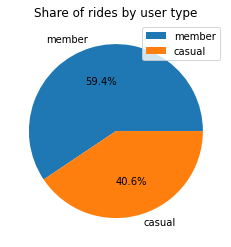

In [18]:
plt.pie(member_type.values, labels =member_type.index,autopct='%1.1f%%')
plt.title("Share of rides by user type")
plt.legend(member_type.index)
plt.show()

More member rides than casual

In [19]:
casual_type = finframe.pivot_table(index =['member_casual','rideable_type'],
                       values = ['duration_minutes'],
                       aggfunc ={'mean'})
print(casual_type)
df_length_day = pd.DataFrame({'Bike Type':casual_type.reset_index()["rideable_type"],
                                     'Ride Duration' : casual_type.reset_index()['duration_minutes']['mean']})

                            duration_minutes
                                        mean
member_casual rideable_type                 
casual        classic_bike         22.411847
              docked_bike          39.819375
              electric_bike        17.557049
member        classic_bike         12.767491
              electric_bike        11.384552


In [20]:
speed = finframe.pivot_table(index =['member_casual'],
                       values = ['avg_speed_mph'],
                       aggfunc ={'mean'})
print(speed)

              avg_speed_mph
                       mean
member_casual              
casual             5.709378
member             7.171175


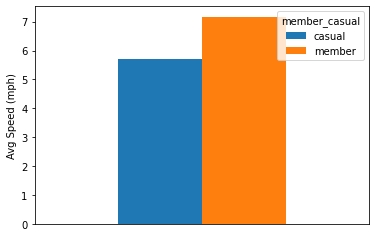

In [21]:
plot = speed.T.plot(kind='bar', ylabel='Avg Speed (mph)')
plot.axes.get_xaxis().set_visible(False)

In [22]:
speed_bike = finframe.pivot_table(index =['member_casual','rideable_type'],
                       values = ['avg_speed_mph'],
                       aggfunc ={'mean'})
df_speed_bike = pd.DataFrame({'Bike Type':speed_bike.reset_index()["rideable_type"],
                                     'Avg Speed' : speed_bike.reset_index()['avg_speed_mph']['mean']})
df_speed_bike

,Bike Type,Avg Speed
0,classic_bike,5.310507
1,docked_bike,3.858731
2,electric_bike,7.083086
3,classic_bike,6.568355
4,electric_bike,8.698600


<AxesSubplot:xlabel='Bike Type', ylabel='Avg Speed'>

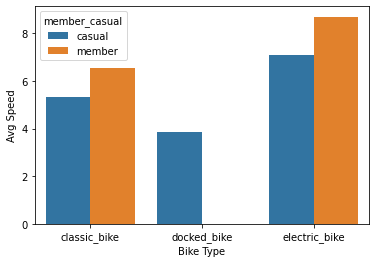

In [23]:
sns.barplot(x='Bike Type', y= 'Avg Speed',data = df_speed_bike, hue = speed_bike.reset_index()['member_casual'])

Across both types member travel faster

In [24]:
count_bike = finframe.pivot_table(index =['member_casual','rideable_type'],
                       values = ['ride_id'],
                       aggfunc ={'count'})
df_count_bike = pd.DataFrame({'Bike Type':count_bike.reset_index()["rideable_type"],
                                     'Number of Rides' : count_bike.reset_index()['ride_id']['count']})
df_count_bike

,Bike Type,Number of Rides
0,classic_bike,1023867
1,docked_bike,183187
2,electric_bike,544079
3,classic_bike,1836364
4,electric_bike,724747


<AxesSubplot:xlabel='Bike Type', ylabel='Number of Rides'>

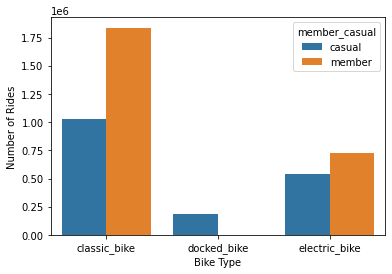

In [25]:
sns.barplot(x='Bike Type', y= 'Number of Rides',data = df_count_bike, hue = count_bike.reset_index()['member_casual'])

Members prefer classic bike

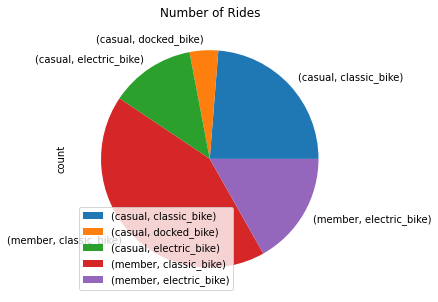

In [26]:
plot = count_bike.plot.pie(y='ride_id', figsize=(5, 5), title = 'Number of Rides')

In [27]:
ride_length = finframe.pivot_table(index =['member_casual'],
                       values = ['duration_minutes'],
                       aggfunc ={'mean'})
print(ride_length)

              duration_minutes
                          mean
member_casual                 
casual               22.724467
member               12.376145


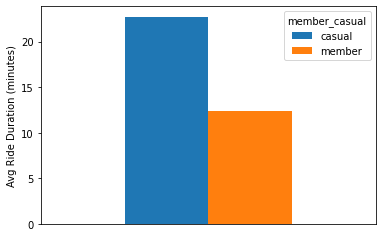

In [28]:
plot = ride_length.T.plot(kind='bar', ylabel='Avg Ride Duration (minutes)')
plot.axes.get_xaxis().set_visible(False)

Members take shorter rides

In [29]:
length_day = finframe.pivot_table(index =['member_casual','weekday'],
                       values = ['duration_minutes'],
                       aggfunc ={'mean'})
print(length_day)
df_length_day = pd.DataFrame({'weekday':length_day.reset_index()["weekday"],
                                     'Ride Duration' : length_day.reset_index()['duration_minutes']['mean']})

                        duration_minutes
                                    mean
member_casual weekday                   
casual        Friday           21.180258
              Monday           23.071428
              Saturday         25.417779
              Sunday           25.997943
              Thursday         19.887783
              Tuesday          19.619900
              Wednesday        19.354946
member        Friday           12.056935
              Monday           11.959844
              Saturday         14.010689
              Sunday           14.106398
              Thursday         11.842047
              Tuesday          11.548447
              Wednesday        11.672760


<AxesSubplot:xlabel='weekday', ylabel='Ride Duration'>

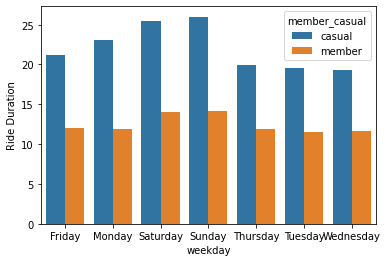

In [30]:
sns.barplot(x='weekday', y= 'Ride Duration',data = df_length_day, hue = length_day.reset_index()['member_casual'])

Members use the bike for the same duration regardless of day

In [31]:
total_length_day = finframe.pivot_table(index =['member_casual','weekday'],
                       values = ['duration_minutes'],
                       aggfunc ={'count'})
print(total_length_day)
df_total_length_day = pd.DataFrame({'Weekday':total_length_day.reset_index()["weekday"],
                                     'Total Ride Minutes' : total_length_day.reset_index()['duration_minutes']['count']})

                        duration_minutes
                                   count
member_casual weekday                   
casual        Friday              239739
              Monday              202126
              Saturday            380692
              Sunday              337151
              Thursday            215741
              Tuesday             184801
              Wednesday           190883
member        Friday              349007
              Monday              360586
              Saturday            337851
              Sunday              310970
              Thursday            397623
              Tuesday             403206
              Wednesday           401868


<AxesSubplot:xlabel='Weekday', ylabel='Total Ride Minutes'>

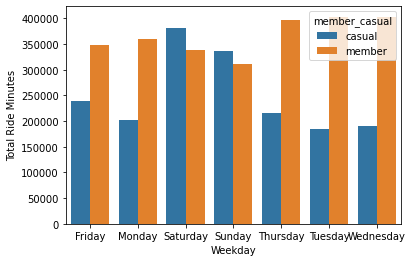

In [32]:
sns.barplot(x='Weekday', y= 'Total Ride Minutes',data = df_total_length_day, hue = total_length_day.reset_index()['member_casual'])

Memeber ride more during weekdays than weekends

In [33]:
month_use = finframe.pivot_table(index =['member_casual','month'],
                       values = ['ride_id'],
                       aggfunc ={'count'})
print(month_use)

                    ride_id
                      count
member_casual month        
casual        1       11523
              2       13711
              3       59203
              4       81857
              5      194211
              6      261237
              7      277437
              8      307881
              9      265822
              10     173053
              11      64188
              12      41010
member        1       64913
              2       70927
              3      142822
              4      173206
              5      268630
              6      312634
              7      314185
              8      318565
              9      314326
              10     276276
              11     178405
              12     126222


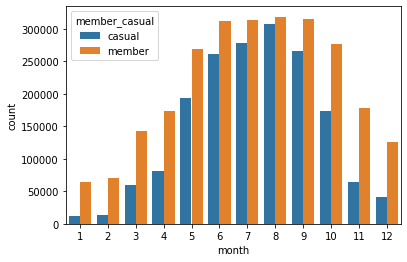

In [34]:
sns.barplot(x =month_use.reset_index()['month'], y= month_use.reset_index()['ride_id']['count'],
            hue =  month_use.reset_index()['member_casual']);

In [35]:
distance = finframe.pivot_table(index =['member_casual'],
                       values = ['distance'],
                       aggfunc ={'mean'})
print(distance)
df_distance = pd.DataFrame({'Member Type':distance.reset_index()["member_casual"],
                                     'Avg Distance Traveled' : distance.reset_index()['distance']['mean']})

               distance
                   mean
member_casual          
casual         1.544848
member         1.360242


<AxesSubplot:xlabel='Member Type', ylabel='Avg Distance Traveled'>

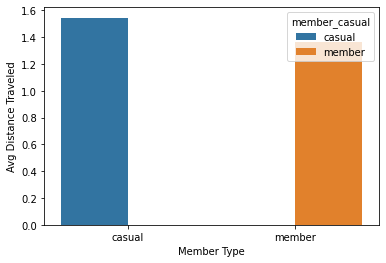

In [36]:
sns.barplot(x='Member Type', y= 'Avg Distance Traveled',data = df_distance, hue = distance.reset_index()['member_casual'])

In [37]:
distance_bike = finframe.pivot_table(index =['member_casual','rideable_type'],
                       values = ['distance'],
                       aggfunc ={'mean'})
print(distance_bike)
df_distance_bike = pd.DataFrame({'Bike Type':distance_bike.reset_index()["rideable_type"],
                                     'Avg Distance Traveled' : distance_bike.reset_index()['distance']['mean']})

                             distance
                                 mean
member_casual rideable_type          
casual        classic_bike   1.478377
              docked_bike    1.667869
              electric_bike  1.628516
member        classic_bike   1.287415
              electric_bike  1.544772


<AxesSubplot:xlabel='Bike Type', ylabel='Avg Distance Traveled'>

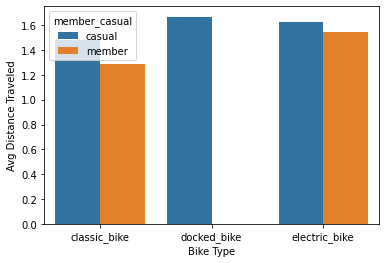

In [38]:
sns.barplot(x='Bike Type', y= 'Avg Distance Traveled',data = df_distance_bike, hue = distance_bike.reset_index()['member_casual'])

Members are more sensetive to seasonal changes and ride most in warmer months

Alltogether, members behave much different that casual riders.  Now I have to relate this back to the originial question:
Which riders should be marketed to to maximise anual memberships.

The data shows that members ride faster, ride shorter distances, ride more during weekends rather than weekdays, ride more during summer months, ride significantly more on the classic bike rather than electric, and take up most of the total rides.


Analyst Reccomendation:

Focus marketing efforts on commuting riders who bike quickly and go shorter distances.  These promotions should take place before and during June-Aug.
More demographic information would improve analysis efforts.

Reflection:

When looking at other similar projects the most overlooked sections is data cleaning.  Most people completing the Google Data Analytics Certificate forgot to remove recording errors or large outlies like negative or great distances and ride durations.  Aditionally most other analysts did not include distance and speed data and only relied on duration information. Although it was not necessary here is is still an important factor to consider.

Some things that I wanted to inclucde but was incapable: geographic analysis based on station and latitude & longitude data.  Map of member vs casual rides displayed over chicago city map.

Overall I enjoyed this project and look foreward to my work ahead